In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       73462 non-null  int64 
 1   Age              73462 non-null  object
 2   Accessibility    73462 non-null  object
 3   EdLevel          73462 non-null  object
 4   Employment       73462 non-null  int64 
 5   Gender           73462 non-null  object
 6   MentalHealth     73462 non-null  object
 7   MainBranch       73462 non-null  object
 8   Years of Coding  73462 non-null  int64 
 9   YearsofProCode   73462 non-null  int64 
 10  Country          73462 non-null  object
 11  PreviousSalary   73462 non-null  object
 12  ComputerSkills   73462 non-null  int64 
 13  Employed         73462 non-null  int64 
 14  Skills           73399 non-null  object
dtypes: int64(6), object(9)
memory usage: 8.4+ MB
None
          Unnamed: 0    Age Accessibility 

<ipython-input-3-7cc5cccfeeb7>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PreviousSalary'].fillna(0, inplace=True)
<ipython-input-3-7cc5cccfeeb7>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

         Country  Employed  PreviousSalary
0    Afghanistan         0         320.368
1    Afghanistan         1         246.048
2        Albania         0         598.724
3        Albania         1         888.752
4        Algeria         0         176.222
..           ...       ...             ...
324        Yemen         1          81.964
325       Zambia         0          29.772
326       Zambia         1         204.832
327     Zimbabwe         0         115.932
328     Zimbabwe         1         160.260

[329 rows x 3 columns]
          EdLevel     Gender  YearsofProCode
0          Master        Man        9.909892
1          Master  NonBinary        9.450292
2          Master      Woman        7.221996
3      NoHigherEd        Man        8.482877
4      NoHigherEd  NonBinary        6.428571
5      NoHigherEd      Woman        4.610169
6           Other        Man       10.346037
7           Other  NonBinary        9.610656
8           Other      Woman        6.628415
9         

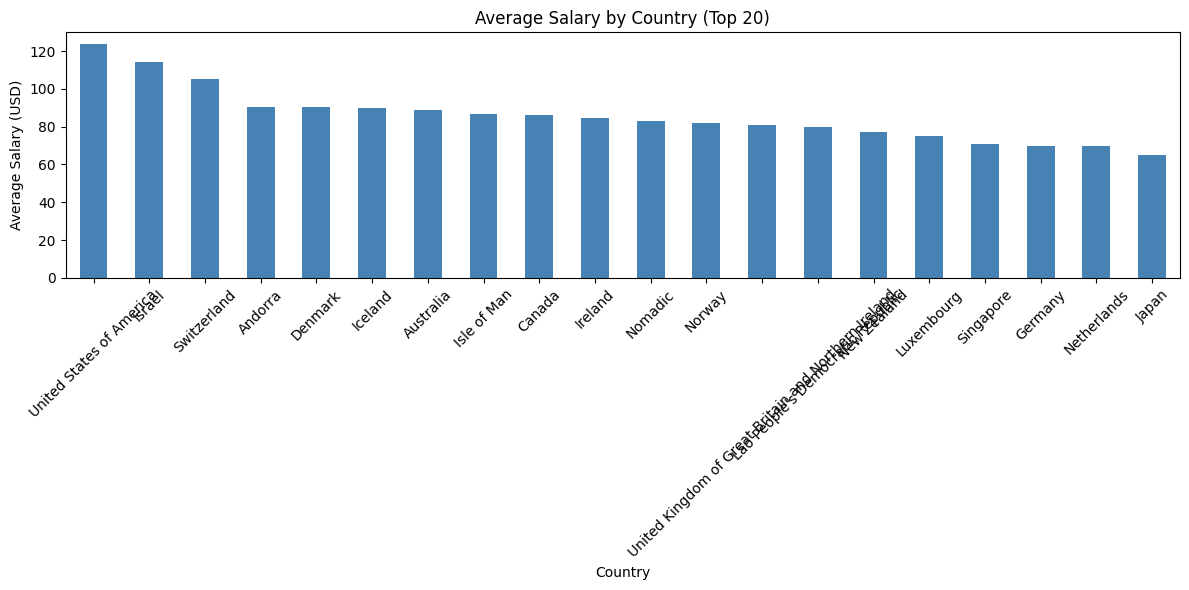

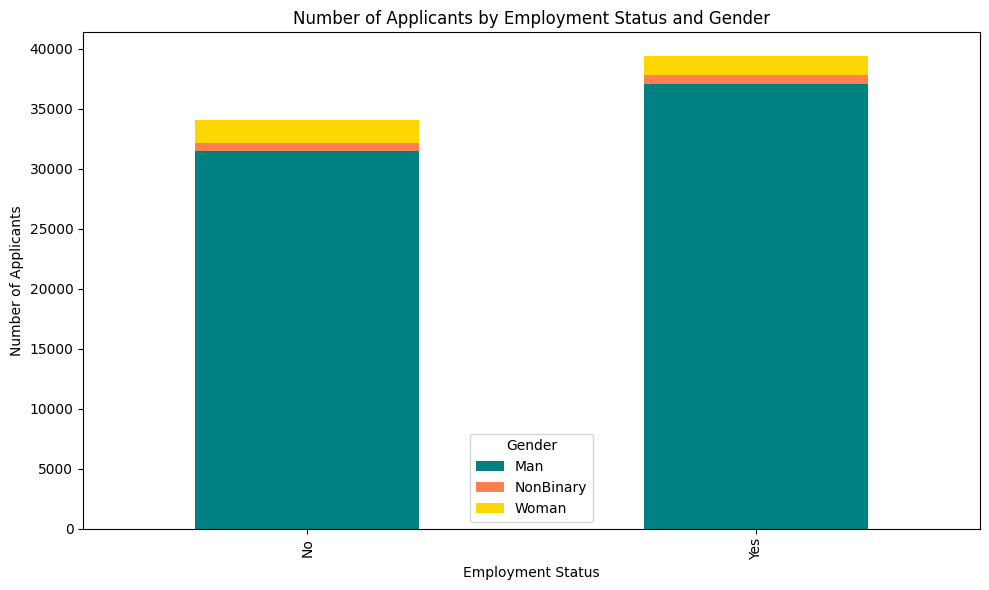

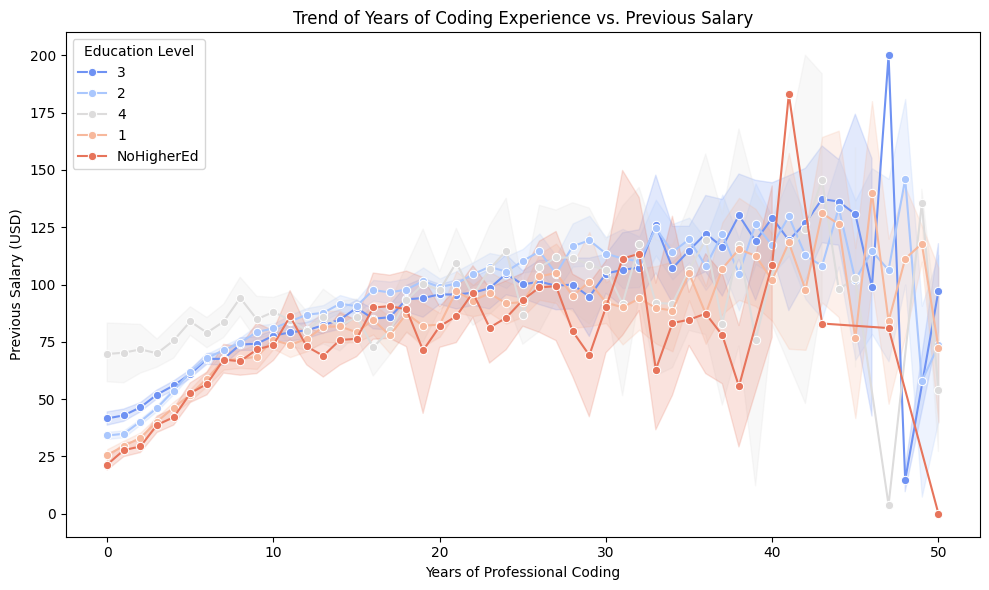

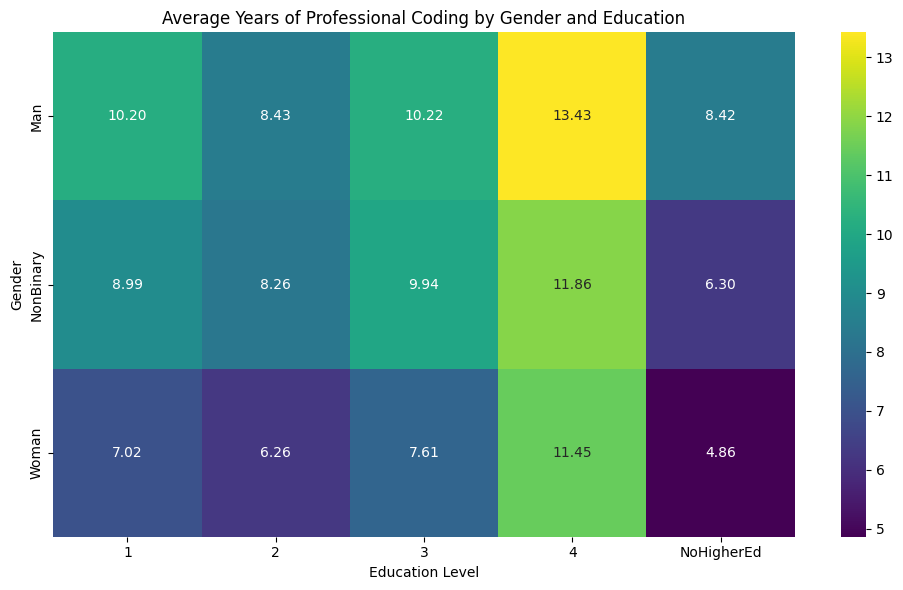

--- Summary Insights ---
Country
United States of America                                123.776013
Israel                                                  114.151069
Switzerland                                             105.379508
Andorra                                                  90.379273
Denmark                                                  90.197163
Iceland                                                  89.739400
Australia                                                89.010657
Isle of Man                                              86.608500
Canada                                                   86.352827
Ireland                                                  84.811465
Nomadic                                                  83.039960
Norway                                                   81.977637
United Kingdom of Great Britain and Northern Ireland     81.117031
Lao People's Democratic Republic                         79.739400
New Zealand                  

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/bilal work/bilaldata.xlsx'
try:
    df = pd.read_excel(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please ensure the file path is correct.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

print(df.info())
print(df.describe(include='all'))
print(df.head())

def convert_salary(salary_str):
    try:
        salary_str = str(salary_str).lower().replace('k', '').replace(',', '')
        return float(salary_str)
    except ValueError:
        return np.nan

df['PreviousSalary'] = df['PreviousSalary'].apply(convert_salary)
df['PreviousSalary'].fillna(0, inplace=True)

def convert_age(age_str):
    try:
        return int(age_str)
    except ValueError:
        if '<35' in age_str:
            return 34
        return np.nan

df['Age'] = df['Age'].apply(convert_age)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['AgeRank'] = df['Age'].apply(lambda x: 1 if x < 35 else (2 if x == 35 else 3))
ed_rank_map = {'PhD': 4, 'Master': 3, 'Undergraduate': 2, 'Others': 1}
df['EdRank'] = df['EdLevel'].map(ed_rank_map).fillna(0).astype(int)
df['YearsofProCode'].fillna(df['YearsofProCode'].median(), inplace=True)

table_1 = df.groupby(['Country', 'Employed'])['PreviousSalary'].sum().reset_index()
table_2 = df.groupby(['EdLevel', 'Gender'])['YearsofProCode'].mean().reset_index()

print(table_1)
print(table_2)

df['Employed'] = df['Employed'].map({1: 'Yes', 0: 'No'})
valid_ed_levels = {'PhD': 4, 'Master': 3, 'Undergraduate': 2, 'Other': 1}
df['EdLevel'] = df['EdLevel'].replace(valid_ed_levels.keys(), valid_ed_levels.values())

employed_data = df[(df['Employed'] == 'Yes') & (df['EdLevel'].notna())]
if not employed_data.empty:
    average_years_by_education = (
        employed_data.groupby(['EdLevel', 'Gender'])['YearsofProCode'].mean()
    )
    print(average_years_by_education)
else:
    print("No data available for employed applicants with valid education levels.")

plt.figure(figsize=(12, 6))
average_salary_by_country = df.groupby('Country')['PreviousSalary'].mean()
average_salary_by_country.sort_values(ascending=False).head(20).plot(kind='bar', color='steelblue')
plt.title("Average Salary by Country (Top 20)")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

employment_gender_data = df.groupby(['Employed', 'Gender']).size().unstack(fill_value=0)
employment_gender_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['teal', 'coral', 'gold'])
plt.title("Number of Applicants by Employment Status and Gender")
plt.ylabel("Number of Applicants")
plt.xlabel("Employment Status")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='YearsofProCode', y='PreviousSalary', marker='o', hue='EdLevel', palette='coolwarm')
plt.title("Trend of Years of Coding Experience vs. Previous Salary")
plt.xlabel("Years of Professional Coding")
plt.ylabel("Previous Salary (USD)")
plt.legend(title="Education Level")
plt.tight_layout()
plt.show()

average_years_pivot = employed_data.pivot_table(
    values='YearsofProCode', index='Gender', columns='EdLevel', aggfunc='mean'
)
plt.figure(figsize=(10, 6))
sns.heatmap(average_years_pivot, annot=True, fmt=".2f", cmap='viridis')
plt.title("Average Years of Professional Coding by Gender and Education")
plt.xlabel("Education Level")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()

print("--- Summary Insights ---")
print(average_salary_by_country.sort_values(ascending=False).head(20))
print(average_years_by_education)


<ipython-input-4-a0228291cdd4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='EdLevel', y='PreviousSalary', palette='pastel')


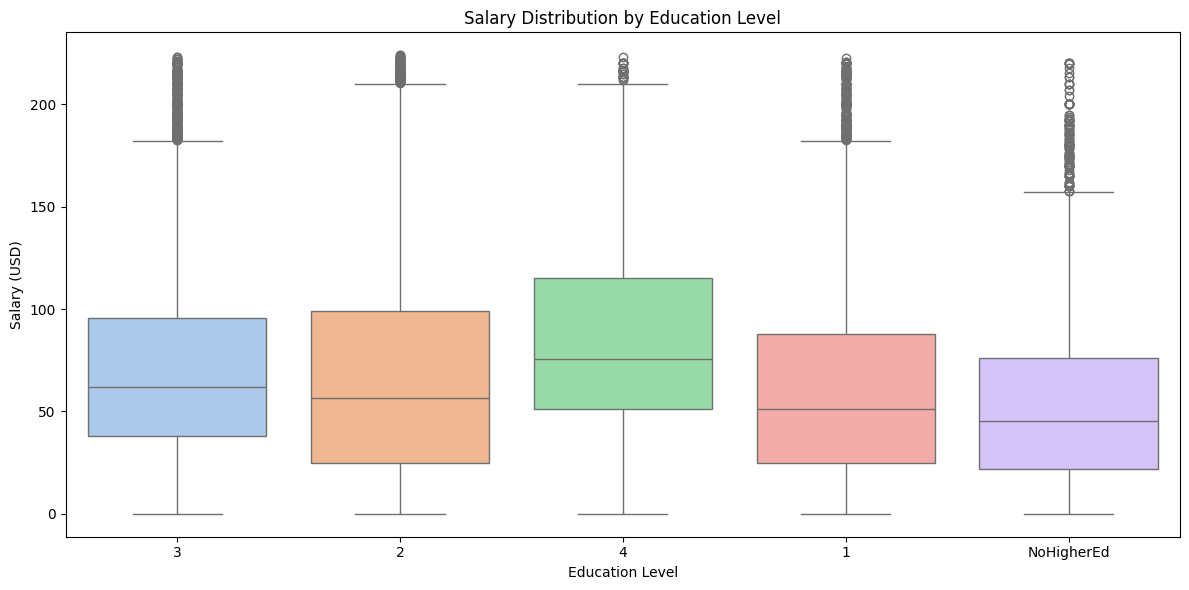

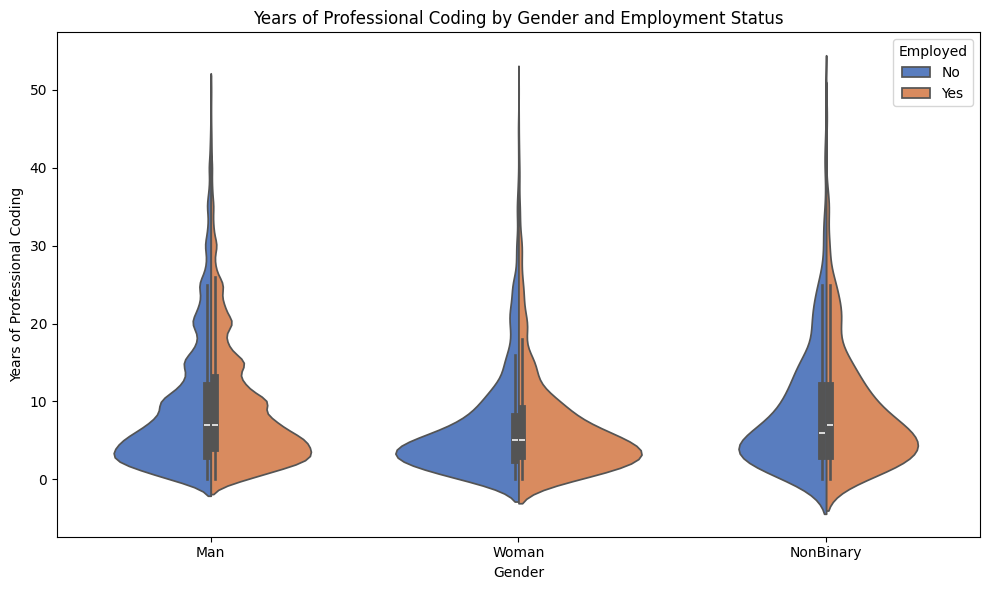

<ipython-input-4-a0228291cdd4>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index[:10], palette='cool')


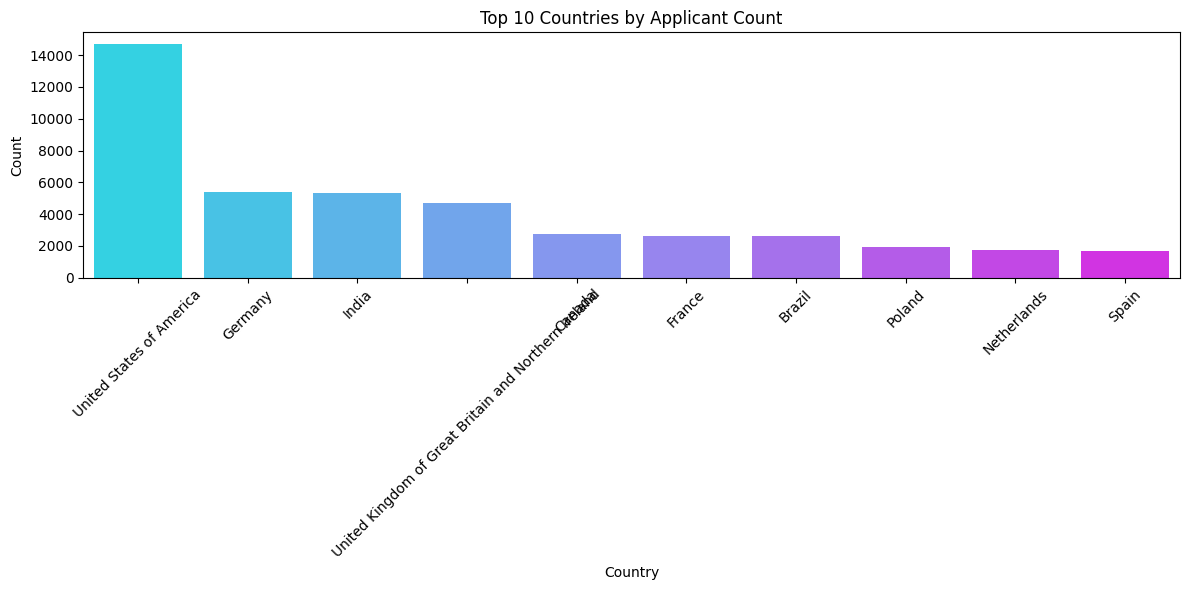

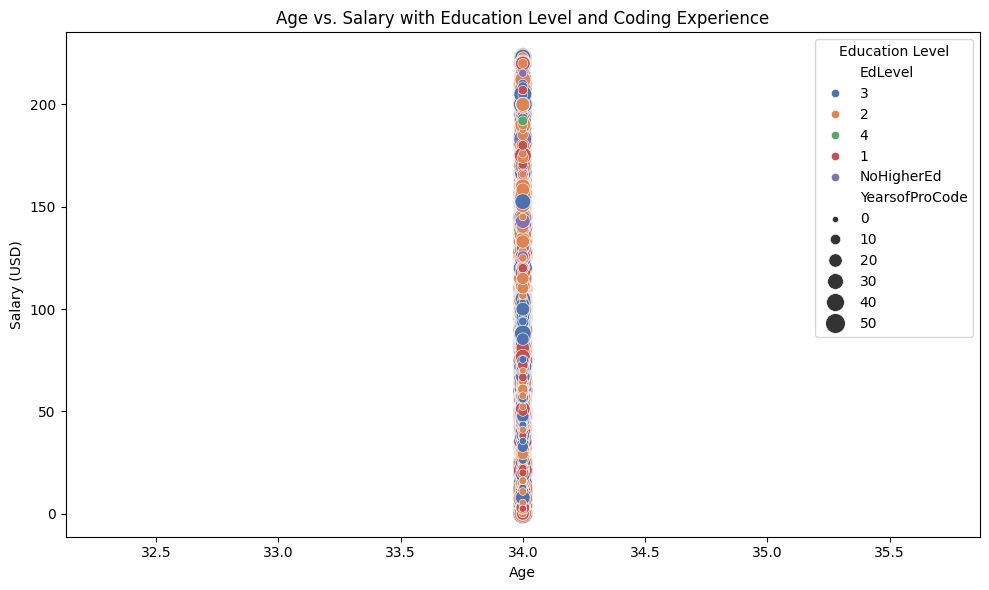

--- Summary Insights ---
Country
United States of America                                123.776013
Israel                                                  114.151069
Switzerland                                             105.379508
Andorra                                                  90.379273
Denmark                                                  90.197163
Iceland                                                  89.739400
Australia                                                89.010657
Isle of Man                                              86.608500
Canada                                                   86.352827
Ireland                                                  84.811465
Nomadic                                                  83.039960
Norway                                                   81.977637
United Kingdom of Great Britain and Northern Ireland     81.117031
Lao People's Democratic Republic                         79.739400
New Zealand                  

In [4]:
# Additional Visualizations

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='EdLevel', y='PreviousSalary', palette='pastel')
plt.title("Salary Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Gender', y='YearsofProCode', hue='Employed', split=True, palette='muted')
plt.title("Years of Professional Coding by Gender and Employment Status")
plt.xlabel("Gender")
plt.ylabel("Years of Professional Coding")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index[:10], palette='cool')
plt.title("Top 10 Countries by Applicant Count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='PreviousSalary', hue='EdLevel', size='YearsofProCode', palette='deep', sizes=(20, 200))
plt.title("Age vs. Salary with Education Level and Coding Experience")
plt.xlabel("Age")
plt.ylabel("Salary (USD)")
plt.legend(title="Education Level")
plt.tight_layout()
plt.show()

print("--- Summary Insights ---")
print(average_salary_by_country.sort_values(ascending=False).head(20))
print(average_years_by_education)
